In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
#Creating 'engine' for reading sqlite filr
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#Creating Base variable and looking into date (table names)
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.metadata.create_all(engine)
Base.classes.keys()

['measurement', 'station']

In [7]:
#Reflecting 'measurment' table
measurement = Base.classes.measurement

In [8]:
#Reflecting 'station' table
station = Base.classes.station

In [9]:
#Creating variable 'inspector' for checking data types of the tables
inspector = inspect(engine)

In [10]:
#Checking data types and columns of the measurment table
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#Checking data types and columns of the station table
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [34]:
#Looking into first 5 rows of the measurment table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [32]:
#Looking into first 5 rows of the station table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
# Creating our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [15]:
#Finding the last date of the precipitation data (table "measurment")
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

In [16]:
#Calculating the date 1 year ago from the last data point in the database 
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [17]:
#Retrieving the last 12 months of precipitation data and saving it
last_year = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
last_year

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [18]:
#Saving the query results as a Pandas DataFrame 
last_year_df = pd.DataFrame(last_year)
last_year_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [19]:
#Dropping Nan-values rows
last_year_cleaned = last_year_df.dropna()
last_year_cleaned

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [20]:
#Setting the index on "date" column
last_year_cleaned = last_year_cleaned.set_index(['date'])
last_year_cleaned

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [21]:
#Sorting the dataframe
last_year_cleaned = last_year_cleaned.sort_values("date")
last_year_cleaned

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


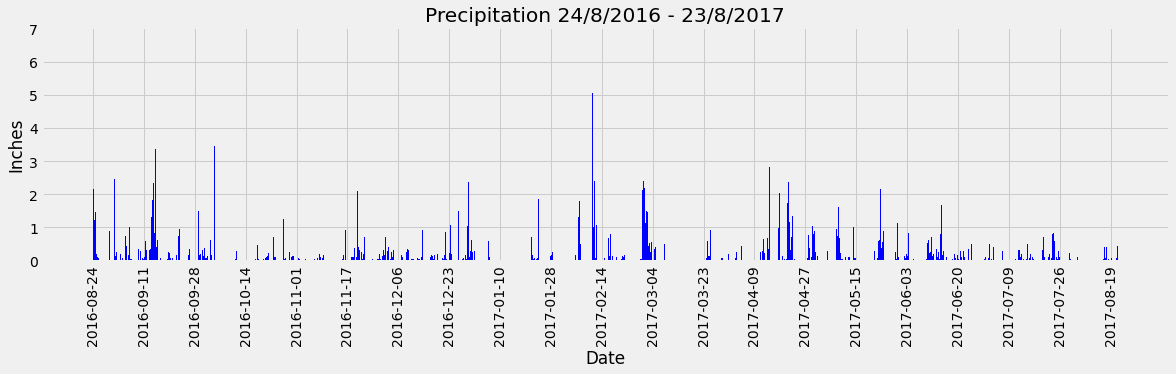

In [44]:
#Creating a bar chart

x_axis = np.arange(len(last_year_cleaned.index))
tick_locations = [value for value in x_axis][::100]
plt.figure(figsize=(18,4))
plt.bar(x_axis, last_year_cleaned['prcp'], color='b', alpha=1, align="center")
plt.xticks(tick_locations, last_year_cleaned.index[::100], rotation="vertical")
plt.title("Precipitation 24/8/2016 - 23/8/2017")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [25]:
# Using Pandas to calcualte the summary statistics for the precipitation data
precipitation = last_year_cleaned['prcp']


In [40]:
#Summary statistics for the precipitation data
print(f"The mean of the precipitation is {precipitation.mean()} inches")
print(f"The median of the precipitation is {precipitation.median()} inches")
print(f"The variance of the precipitation is {precipitation.var()} inches")
print(f"The standart deviation of the precipitation is {precipitation.std()} inches")
print(f"The standard error of the mean of the precipitation is {precipitation.sem()} inches")

The mean of the precipitation is 0.17646153846153845 inches
The median of the precipitation is 0.02 inches
The variance of the precipitation is 0.21186537774043232 inches
The standart deviation of the precipitation is 0.46028836368132564 inches
The standard error of the mean of the precipitation is 0.010253980108219827 inches


In [29]:
# Designing a query to show how many stations are available in this dataset?
count_station = session.query(func.count(station.name)).all()
count_station

[(9)]

In [43]:
# What are the most active stations? (i.e. what stations have the most rows)?
# Listing the stations and the counts in descending order.

chosen_data = [measurement.station, 
       func.count(measurement.id)]
active_station = session.query(*chosen_data).\
        group_by(measurement.station).\
        order_by(func.count(measurement.id).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
chosen_data_1 = [func.min(measurement.tobs),
                 func.max(measurement.tobs),
                 func.avg(measurement.tobs)]
       
active_station_1 = session.query(*chosen_data_1).\
        filter(measurement.station == 'USC00519281').all()
active_station_1

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [57]:
&&&&&&&&&&&
last_year_1 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00513117').\
    filter(measurement.date > '2016-08-23').all()

last_year_1

[('2016-08-24', 76.0),
 ('2016-08-25', 77.0),
 ('2016-08-26', 78.0),
 ('2016-08-27', 73.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 76.0),
 ('2016-08-31', 77.0),
 ('2016-09-01', 79.0),
 ('2016-09-02', 78.0),
 ('2016-09-03', 77.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 74.0),
 ('2016-09-07', 75.0),
 ('2016-09-08', 77.0),
 ('2016-09-09', 76.0),
 ('2016-09-10', 76.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 76.0),
 ('2016-09-14', 76.0),
 ('2016-09-15', 78.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 78.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 75.0),
 ('2016-09-20', 78.0),
 ('2016-09-21', 76.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 76.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 77.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 77.0),
 ('2016-09-28', 77.0),
 ('2016-09-29', 76.0),
 ('2016-09-30', 77.0),
 ('2016-10-01', 75.0),
 ('2016-10-02', 77.0),
 ('2016-10-03', 78.0),
 ('2016-10-04', 78.0),
 ('2016-10-05', 77.0),
 ('2016-10-

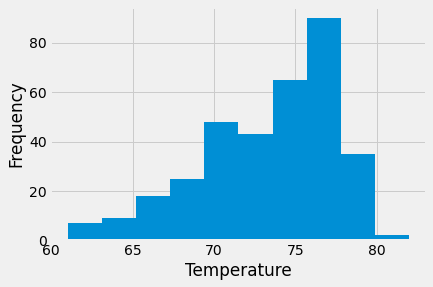

In [58]:

df = pd.DataFrame(last_year_1)

plt.hist(df["tobs"])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
